# ALGORITMO GENÉTICO PARA OTIMIZAR CAMPANHAS DE MARKETING

Uma empresa de comércio eletrônico quer maximizar o lucro de suas campanhas de marketing. Para isso, ela pode investir em diferentes canais de marketing: TikTok, Facebook, Instagram, Email Marketing, Influenciadores Digitais e YouTube.

O valor máximo que a empresa quer destinar para as campanhas de marketing é R$ 150000,00.

Objetivo: Distribuir o orçamento de marketing de forma a maximizar o lucro, considerando o custo por conversão, o número esperado de conversões por $1000 e o lucro por conversão. TODOS OS DADOS SÃO FICTÍCIOS.

Neste código, implementei elitismo e roleta viciada juntos. O elitismo foi feito para selecionar o melhor indivíduo de uma geração x e passar automaticamente ele para a próxima geração (x+1). No crossover, todos os indivíduos da geração x, inclusive o que foi selecionado para a próxima geração (x+1), participaram do sorteio para serem pais pelo método da roleta viciada. Assim, passo o melhor indivíduo encontrado até então (o melhor global) para a próxima geração e ainda garanto no crossover poder ter genes bons de algum cromossomo que tem a maior parte dos genes ruins, ou seja, há maior diversidade por não eliminar os cromossomos "ruins" antes do crossover, permitindo preservar algumas características deles para as próximas gerações.

In [8]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Dados fictícios 
data = {
    'Canal': ['TikTok', 'Facebook', 'Instagram', 'Email Marketing', 'Influenciadores Digitais', 'YouTube'],
    'Custo por Conversão ($)': [55, 60, 70, 40, 100, 65],
    'Conversões Estimadas por $1000': [18, 17, 15, 25, 10, 16],
    'Receita Média por Conversão ($)': [80, 90, 100, 50, 150, 95],
    'Lucro Médio por Conversão ($)': [25, 30, 30, 10, 50, 30],
    'Orçamento Máximo Disponível ($)': [45000, 40000, 30000, 20000, 25000, 35000]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Exibir DataFrame
display(df)

,Canal,Custo por Conversão ($),Conversões Estimadas por $1000,Receita Média por Conversão ($),Lucro Médio por Conversão ($),Orçamento Máximo Disponível ($)
0,TikTok,55,18,80,25,45000
1,Facebook,60,17,90,30,40000
2,Instagram,70,15,100,30,30000
3,Email Marketing,40,25,50,10,20000
4,Influenciadores Digitais,100,10,150,50,25000
5,YouTube,65,16,95,30,35000


### Gera indivíduo

Os indivíduos serão listas com 6 valores (genes), cada um indicando os investimentos em um tipo de campanha de marketing.

In [9]:
def cromossomo(tamanho_crom):
    cromossomo = []
    while True:
        cromossomo = []
        for i in range(tamanho_crom):
            cromossomo.append(round(random.uniform(0,45000), 2))
        soma = sum(cromossomo)
        if cromossomo[0] <= 45000 and cromossomo[1] <=40000 and cromossomo[2] <=30000 \
            and cromossomo[3] <=20000 and cromossomo[4] <=25000 \
            and cromossomo[5] <=35000 and soma <= 150000:
            return cromossomo

In [24]:
cromossomo(6)

[25518.9, 2405.94, 19762.12, 5403.77, 7966.21, 27712.15]

Gera população

In [11]:
def gerar_populacao(tamanho_pop, tamanho_crom):
    populacao = []

    for i in range(tamanho_pop):
        crom = cromossomo(tamanho_crom)
        populacao.append(crom)

    return populacao

In [26]:
gerar_populacao(10, 6)

[[5597.78, 4001.21, 17682.29, 12975.85, 22183.33, 20491.61],
 [13344.09, 34242.15, 2664.55, 2857.97, 19915.24, 15320.61],
 [26478.15, 37770.92, 19995.02, 17391.31, 4722.39, 12796.07],
 [22824.49, 25707.02, 25860.46, 11174.15, 4045.77, 8706.91],
 [34365.14, 38349.42, 1533.96, 4679.73, 9370.06, 28607.77],
 [30695.6, 434.62, 18252.81, 5136.89, 6038.9, 3878.35],
 [22375.99, 13968.01, 5814.96, 11325.56, 4966.64, 1725.72],
 [19429.92, 35053.65, 24916.97, 15066.91, 2732.75, 10578.49],
 [27859.8, 28213.71, 28430.96, 15228.12, 21761.81, 6238.58],
 [44339.07, 39973.16, 27008.57, 5442.87, 105.15, 652.23]]

Função fitness

In [13]:
def fitness(cromossomo):
    lucro = 0
    soma = sum(cromossomo)
    if cromossomo[0] > 45000 or cromossomo[1] > 40000 or cromossomo[2] > 30000 or \
        cromossomo[3] > 20000 or cromossomo[4] > 25000 \
        or cromossomo[5] > 35000 or soma > 150000:
        return 1
    else:
        for indice, valor in enumerate(cromossomo):
            lucro += valor/1000 * df.iloc[indice]['Conversões Estimadas por $1000'] * df.iloc[indice]['Lucro Médio por Conversão ($)']

    return lucro


In [14]:
c = cromossomo(6)
lucro1 = fitness(c)
print(c)
c[1] = 50000

lucro2 = fitness(c)
print(c)

print(lucro1)
print(lucro2)

[5499.16, 15761.04, 4505.51, 3106.19, 24064.18, 11738.34]
[5499.16, 50000, 4505.51, 3106.19, 24064.18, 11738.34]
30983.272600000004
1


Melhor indivíduo

In [15]:
def seleciona_melhor(populacao):
    melhor_cromosomo = populacao[0]
    melhor_lucro = fitness(melhor_cromosomo)
    for i in range(1, len(populacao)):
        if melhor_lucro < fitness(populacao[i]):
                melhor_cromosomo = populacao[i]
                melhor_lucro = fitness(populacao[i])

    return melhor_lucro, melhor_cromosomo

In [16]:
print(seleciona_melhor(gerar_populacao(10, 6)))

(49865.980299999996, [15987.59, 24447.72, 3781.35, 18633.11, 17398.81, 31549.87])


Seleção dos pais pela roleta viciada

In [17]:
def soma_avaliacoes(populacao):
    soma_avalicao = 0
    for individuo in populacao:
        soma_avalicao += fitness(individuo)
    return soma_avalicao


def seleciona_pai(soma_avaliacao, populacao):
    pai = -1 # nao selecionou nenhum individuo ainda
    valor_sorteado = random.random() * soma_avaliacao # Simula a roleta sendo girada
    soma = 0
    i = 0
    # Os inviduos menos aptos tem nota 1, então dificilmente serão escolhidos na roleta
    while i < len(populacao) and soma < valor_sorteado:
        soma += fitness(populacao[i])
        pai += 1
        i += 1
    return pai
    

Crossover

In [18]:
def crossover(pai1, pai2):
    ponto_crossover = random.randint(0, len(pai1) - 1)  # Escolhe um ponto de crossover
    filho = []
    filho = [0.6 * pai1[i] + 0.4 * pai2[i] if i < ponto_crossover else 0.4 * pai1[i] + 0.6 * pai2[i] for i in range(len(pai1))]
    return filho


Mutação

In [19]:
def mutacao(cromossomo, taxa_mutacao):
        
        for i in range(len(cromossomo)):
            if random.random() < taxa_mutacao:
                if random.random() < 0.5:
                    cromossomo[i] *= 1.1
                else:
                    cromossomo[i] *= 0.9

        return cromossomo

Restaurando o tamanho da população

In [20]:
def nova_populacao(populacao, taxa_mutacao, nMelhores, soma_avaliacao, melhor_cromo):
    # O crossover é aplicado selecionando indivíduos entre toda a populaçao atual
    nova_pop = [melhor_cromo]

    while len(nova_pop) < len(populacao):
        pai1 = seleciona_pai(soma_avaliacao, populacao)
        pai2 = seleciona_pai(soma_avaliacao, populacao)
        novo_cromo = crossover(populacao[pai1], populacao[pai2])
        nova_pop.append(mutacao(novo_cromo, taxa_mutacao))

    return nova_pop


## EXECUÇÃO DO ALGORITMO

In [21]:
def alg_genetico(geracoes, tamanho_pop):
    melhores = []
    nova_pop = []
    pop = gerar_populacao(tamanho_pop,6) # Criando 10 cromossomos com 6 genes
    melhor_geral = seleciona_melhor(pop)
    melhores.append(melhor_geral)
    
    for i in range(geracoes):
        soma_avaliacao = soma_avaliacoes(pop)
        nova_pop = nova_populacao(pop, 0.1, round(tamanho_pop*0.15), soma_avaliacao, melhor_geral[1])
        melhor_geral = seleciona_melhor(nova_pop)
        print(f'Geração {i+1}: {melhor_geral}\n')
        melhores.append(melhor_geral)
        pop = nova_pop
    
    return melhores

Geração 1: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 2: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 3: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 4: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 5: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 6: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 7: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 8: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 9: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 10: (59911.336299999995, [29766.25, 25678.57, 16027.78, 12019.91, 15592.57, 32097.27])

Geração 11: (59911.336299999995, [29766.25, 25678

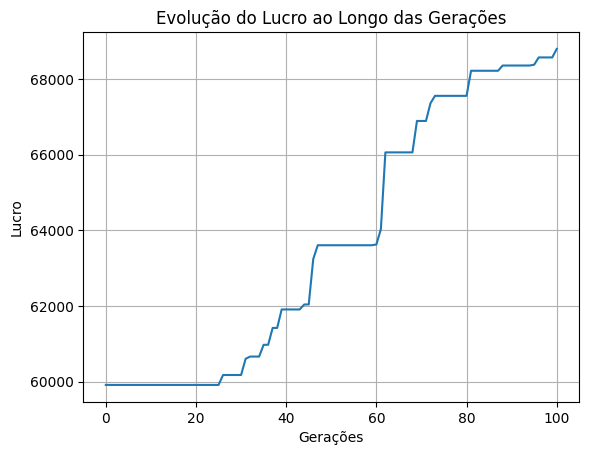

In [28]:
# Execução do algoritmo
melhores = alg_genetico(100, 20)

# Extração dos valores de lucro dos melhores cromossomos
lucros = [lucro for lucro, cromossomo in melhores]

# Criação do gráfico de linhas
plt.plot(lucros)
plt.xlabel('Gerações')
plt.ylabel('Lucro')
plt.title('Evolução do Lucro ao Longo das Gerações')
plt.grid(True)
plt.show()

In [23]:
max(melhores)

(69906.81304242939,
 [37695.6650547258,
  38370.9080700625,
  8277.441281032792,
  9913.024315528664,
  22875.257881322395,
  32778.88970013082])